## About Company

Happy Customer Bank is a mid-sized private bank which deals in all kinds of loans. They have presence across all major cities in India and focus on lending products. They have a digital arm which sources customers from the internet.

## Problem

Digital arms of banks today face challenges with lead conversion, they source leads through mediums like search, display, email campaigns and via affiliate partners. Here Happy Customer Bank faces same challenge of low conversion ratio. They have given a problem to identify the customers segments having higher conversion ratio for a specific loan product so that they can specifically target these customers, here they have provided a partial data set for salaried customers only from the last 3 months. They also capture basic details about customers like gender, DOB, existing EMI, employer Name, Loan Amount Required, Monthly Income, City, Interaction data and many others. Let’s look at the process at Happy Customer Bank.

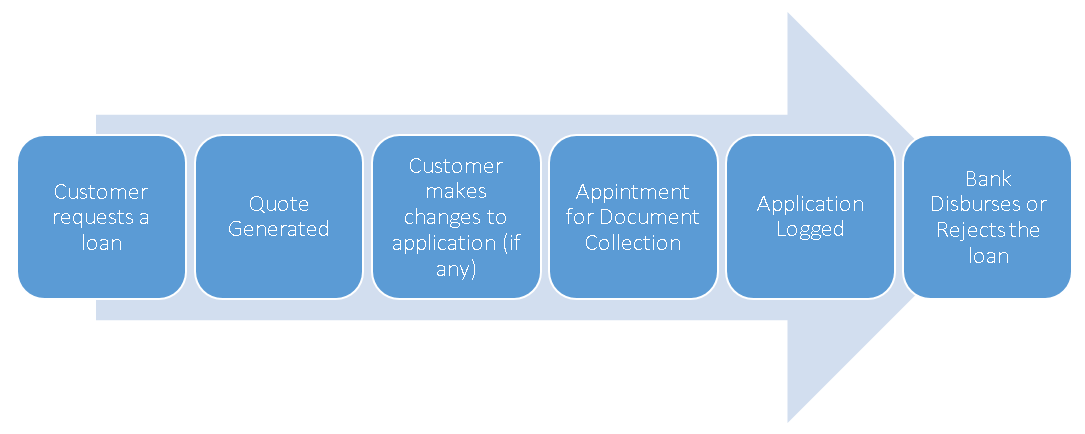

In [18]:
from IPython.display import Image
Image(filename = "Images/Process_at_Happy_Customer_Bank.png",width=800, height=400)

In above process, customer applications can drop majorly at two stages, at login and approval/ rejection by bank. Here we need to identify the segment of customers having higher disbursal rate in next 30 days.
Data Set
We have train and test data set, train data set has both input and output variable(s). Need to predict probability of disbursal for test data set.

## Data Set
We have train and test data set, train data set has both input and output variable(s). Need to predict probability of disbursal for test data set.

Source of data:

https://discuss.analyticsvidhya.com/t/hackathon-3-x-predict-customer-worth-for-happy-customer-bank/3802

## Input variables:


    ID - Unique ID (can not be used for predictions)
    Gender- Sex
    City - Current City
    Monthly_Income - Monthly Income in rupees
    DOB - Date of Birth
    Lead_Creation_Date - Lead Created on date
    Loan_Amount_Applied - Loan Amount Requested (INR)
    Loan_Tenure_Applied - Loan Tenure Requested (in years)
    Existing_EMI - EMI of Existing Loans (INR)
    Employer_Name - Employer Name
    Salary_Account- Salary account with Bank
    Mobile_Verified - Mobile Verified (Y/N)
    Var5- Continuous classified variable
    Var1- Categorical variable with multiple levels
    Loan_Amount_Submitted- Loan Amount Revised and Selected after seeing Eligibility
    Loan_Tenure_Submitted- Loan Tenure Revised and Selected after seeing Eligibility (Years)
    Interest_Rate- Interest Rate of Submitted Loan Amount
    Processing_Fee- Processing Fee of Submitted Loan Amount (INR)
    EMI_Loan_Submitted- EMI of Submitted Loan Amount (INR)
    Filled_Form- Filled Application form post quote
    Device_Type- Device from which application was made (Browser/ Mobile)
    Var2- Categorical Variable with multiple Levels
    Source- Categorical Variable with multiple Levels
    Var4- Categorical Variable with multiple Levels
    
## Outcomes:

    LoggedIn- Application Logged (Variable for understanding the problem – cannot be used in prediction)
    Disbursed- Loan Disbursed (Target Variable)

# -------------------------------------------------------------------------------------------------------------

In [19]:
import numpy as np
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt

In [20]:
#Reading data. The file has been saved according to the ISO-8859-1 standard what it refers to as "Latin alphabet no. 1"
data = pd.read_csv('Data/HappyCustomerBank/Train_nyOWmfK.csv',encoding='latin_1')
print(data.shape)

(87020, 26)


In [21]:
data.head()

,ID,Gender,City,Monthly_Income,DOB,Lead_Creation_Date,Loan_Amount_Applied,Loan_Tenure_Applied,Existing_EMI,Employer_Name,...,Interest_Rate,Processing_Fee,EMI_Loan_Submitted,Filled_Form,Device_Type,Var2,Source,Var4,LoggedIn,Disbursed
0,ID000002C20,Female,Delhi,20000,23-May-78,15-May-15,300000.0,5.0,0.0,CYBOSOL,...,NaN,NaN,NaN,N,Web-browser,G,S122,1,0,0
1,ID000004E40,Male,Mumbai,35000,07-Oct-85,04-May-15,200000.0,2.0,0.0,TATA CONSULTANCY SERVICES LTD (TCS),...,13.25,NaN,6762.9,N,Web-browser,G,S122,3,0,0
2,ID000007H20,Male,Panchkula,22500,10-Oct-81,19-May-15,600000.0,4.0,0.0,ALCHEMIST HOSPITALS LTD,...,NaN,NaN,NaN,N,Web-browser,B,S143,1,0,0
3,ID000008I30,Male,Saharsa,35000,30-Nov-87,09-May-15,1000000.0,5.0,0.0,BIHAR GOVERNMENT,...,NaN,NaN,NaN,N,Web-browser,B,S143,3,0,0
4,ID000009J40,Male,Bengaluru,100000,17-Feb-84,20-May-15,500000.0,2.0,25000.0,GLOBAL EDGE SOFTWARE,...,NaN,NaN,NaN,N,Web-browser,B,S134,3,1,0


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87020 entries, 0 to 87019
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     87020 non-null  object 
 1   Gender                 87020 non-null  object 
 2   City                   86017 non-null  object 
 3   Monthly_Income         87020 non-null  int64  
 4   DOB                    87020 non-null  object 
 5   Lead_Creation_Date     87020 non-null  object 
 6   Loan_Amount_Applied    86949 non-null  float64
 7   Loan_Tenure_Applied    86949 non-null  float64
 8   Existing_EMI           86949 non-null  float64
 9   Employer_Name          86949 non-null  object 
 10  Salary_Account         75256 non-null  object 
 11  Mobile_Verified        87020 non-null  object 
 12  Var5                   87020 non-null  int64  
 13  Var1                   87020 non-null  object 
 14  Loan_Amount_Submitted  52407 non-null  float64
 15  Lo

In [23]:
data.City.value_counts()

Delhi        12527
Bengaluru    10824
Mumbai       10795
Hyderabad     7272
Chennai       6916
             ...  
Muktsar          1
Raisen           1
Damoh            1
KHAMBHAT         1
Madhepura        1
Name: City, Length: 697, dtype: int64

# Data preparation

### Cities

Informations about cityies are important. The number of applications from a given city correlates with the actual city size. Without using an additional file with the number of poles in individual cities of India, we can easily use the number of applications that approximately shows the size of the city.

In [24]:
cities_dict = {}
cities_bins = pd.cut(data.City.value_counts(),
                     bins=5,
                     labels=['V','IV','III','II','I'])
cities_bins.head(10)

Delhi          I
Bengaluru      I
Mumbai         I
Hyderabad    III
Chennai      III
Pune         III
Kolkata       IV
Ahmedabad      V
Jaipur         V
Gurgaon        V
Name: City, dtype: category
Categories (5, object): ['V' < 'IV' < 'III' < 'II' < 'I']

In [25]:
cities_vals = cities_bins.values
cities_idx = cities_bins.index

for vals, indx in zip(cities_vals, cities_idx):
    cities_dict[indx] = vals
    
cities_dict

{'Delhi': 'I',
 'Bengaluru': 'I',
 'Mumbai': 'I',
 'Hyderabad': 'III',
 'Chennai': 'III',
 'Pune': 'III',
 'Kolkata': 'IV',
 'Ahmedabad': 'V',
 'Jaipur': 'V',
 'Gurgaon': 'V',
 'Coimbatore': 'V',
 'Thane': 'V',
 'Chandigarh': 'V',
 'Surat': 'V',
 'Visakhapatnam': 'V',
 'Indore': 'V',
 'Vadodara': 'V',
 'Nagpur': 'V',
 'Lucknow': 'V',
 'Ghaziabad': 'V',
 'Bhopal': 'V',
 'Kochi': 'V',
 'Patna': 'V',
 'Faridabad': 'V',
 'Madurai': 'V',
 'Noida': 'V',
 'Gautam Buddha Nagar': 'V',
 'Dehradun': 'V',
 'Raipur': 'V',
 'Bhubaneswar': 'V',
 'Vijayawada': 'V',
 'Ludhiana': 'V',
 'Aurangabad': 'V',
 'Nashik': 'V',
 'Agra': 'V',
 'Meerut': 'V',
 'Kanpur': 'V',
 'Thiruvananthapuram': 'V',
 'Secunderabad': 'V',
 'Mysore': 'V',
 'Varanasi': 'V',
 'Guwahati': 'V',
 'Hooghly': 'V',
 'North 24 Parganas': 'V',
 'Guntur': 'V',
 'Howrah': 'V',
 'Tiruchirapalli': 'V',
 'Ernakulam': 'V',
 'Pondicherry': 'V',
 'Allahabad': 'V',
 'Udaipur': 'V',
 'Tiruppur': 'V',
 'Ranchi': 'V',
 'Jodhpur': 'V',
 'Rajkot': 'V',

In [26]:
data['City_grouped'] = data.City.map(cities_dict)

In [27]:
data.City_grouped.head()

0    I
1    I
2    V
3    V
4    I
Name: City_grouped, dtype: object

In [28]:
cities_chosen = data.City.value_counts().index[:3]
data["City_name"] = data.City.where(data['City'].isin(cities_chosen), other = 'other' )

In [29]:
data["City_name"].value_counts()

other        52874
Delhi        12527
Bengaluru    10824
Mumbai       10795
Name: City_name, dtype: int64

In [30]:
data.drop(['City'], axis=1, inplace=True)
data.head()

,ID,Gender,Monthly_Income,DOB,Lead_Creation_Date,Loan_Amount_Applied,Loan_Tenure_Applied,Existing_EMI,Employer_Name,Salary_Account,...,EMI_Loan_Submitted,Filled_Form,Device_Type,Var2,Source,Var4,LoggedIn,Disbursed,City_grouped,City_name
0,ID000002C20,Female,20000,23-May-78,15-May-15,300000.0,5.0,0.0,CYBOSOL,HDFC Bank,...,NaN,N,Web-browser,G,S122,1,0,0,I,Delhi
1,ID000004E40,Male,35000,07-Oct-85,04-May-15,200000.0,2.0,0.0,TATA CONSULTANCY SERVICES LTD (TCS),ICICI Bank,...,6762.9,N,Web-browser,G,S122,3,0,0,I,Mumbai
2,ID000007H20,Male,22500,10-Oct-81,19-May-15,600000.0,4.0,0.0,ALCHEMIST HOSPITALS LTD,State Bank of India,...,NaN,N,Web-browser,B,S143,1,0,0,V,other
3,ID000008I30,Male,35000,30-Nov-87,09-May-15,1000000.0,5.0,0.0,BIHAR GOVERNMENT,State Bank of India,...,NaN,N,Web-browser,B,S143,3,0,0,V,other
4,ID000009J40,Male,100000,17-Feb-84,20-May-15,500000.0,2.0,25000.0,GLOBAL EDGE SOFTWARE,HDFC Bank,...,NaN,N,Web-browser,B,S134,3,1,0,I,Bengaluru


### Date of birth

Assuming that dataset was composed in 2015, we can estimate age of the client. The rest of information stored in this variable can be dropped.

In [31]:
data['DOB'] = pd.to_datetime(data['DOB'], format='%d-%b-%y')
data['Lead_Creation_Date'] = pd.to_datetime(data['Lead_Creation_Date'], format='%d-%b-%y')
data['Age'] = data.Lead_Creation_Date.apply(lambda x: x.year) - data.DOB.apply(lambda x: x.year)

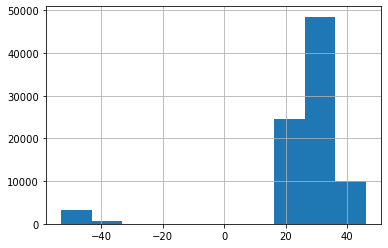

In [32]:
data.Age.hist()
plt.show()

In [35]:
data[data['Age'] < 0].head(3)

,ID,Gender,Monthly_Income,DOB,Lead_Creation_Date,Loan_Amount_Applied,Loan_Tenure_Applied,Existing_EMI,Employer_Name,Salary_Account,...,Filled_Form,Device_Type,Var2,Source,Var4,LoggedIn,Disbursed,City_grouped,City_name,Age
34,ID000052A20,Male,56000,2064-05-28,2015-05-01,500000.0,5.0,14500.0,TEJCONTROL SYSTEMS PVT LTD,HDFC Bank,...,N,Web-browser,E,S133,3,0,0,I,Mumbai,-49
58,ID000084G40,Male,45000,2050-05-20,2015-05-01,0.0,0.0,0.0,XHZ,ICICI Bank,...,N,Web-browser,B,S133,2,0,0,I,Mumbai,-35
89,ID000129Z40,Male,600000,2068-04-01,2015-05-01,1000000.0,5.0,15000.0,GOPALA KRISHNA,State Bank of India,...,N,Web-browser,B,S133,3,0,0,V,other,-53


Inaccurate DOB have been inserted (last 2 digits) and date format has inserted the front 2 digits of the current year. That is why the negative figure for the age has come.

In [40]:
data['Age'] = data.Age.where(data.Age > 0, data.Age+100)

In [41]:
data = data.drop(['DOB','Lead_Creation_Date'], axis=1)

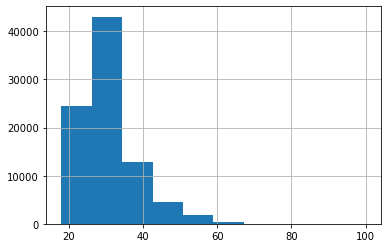

In [42]:
data.Age.hist()
plt.show()

In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87020 entries, 0 to 87019
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     87020 non-null  object 
 1   Gender                 87020 non-null  object 
 2   Monthly_Income         87020 non-null  int64  
 3   Loan_Amount_Applied    86949 non-null  float64
 4   Loan_Tenure_Applied    86949 non-null  float64
 5   Existing_EMI           86949 non-null  float64
 6   Employer_Name          86949 non-null  object 
 7   Salary_Account         75256 non-null  object 
 8   Mobile_Verified        87020 non-null  object 
 9   Var5                   87020 non-null  int64  
 10  Var1                   87020 non-null  object 
 11  Loan_Amount_Submitted  52407 non-null  float64
 12  Loan_Tenure_Submitted  52407 non-null  float64
 13  Interest_Rate          27726 non-null  float64
 14  Processing_Fee         27420 non-null  float64
 15  EM